# **Model AI-Prediksi Harga Mobil Bekas**

**Deskripsi:**

Melakukan analisis mendalam terhadap data penjualan mobil bekas yang diambil dari OLX, berdasarkan filter wilayah di Jabodetabek.

**Tujuan:**

Tujuan utama dari analisis ini adalah untuk memahami tren dan fenomena yang berkaitan dengan penjualan mobil bekas. Data yang diperoleh nantinya akan digunakan untuk membangun model AI yang dapat memprediksi harga mobil bekas di tahun ini.

# **Import Libraries**


In [50]:
# Data Colecting
import pandas as pd
import numpy as np
from datetime import datetime


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Model Defintion
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Model Evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Model Saving
import joblib


# **Data Colecting**


In [51]:
# Data Loading
df = pd.read_excel('data_mobil_jabodetabek.xlsx')
df.head(5)

,Nama_Produk,Lokasi,Tahun,Price,Wilayah
0,Pajak Panjang - Honda Brio Satya 1.2 E Bensin-...,"Bogor Selatan - Kota, Bogor Kota",2015,Rp 96.000.000,Bogor Kota
1,Pajak Panjang - Daihatsu Ayla 1.0 X Bensin-MT ...,"Pulo Gadung, Jakarta Timur",2016,Rp 69.000.000,Jakarta Timur
2,Pajak Panjang - Toyota Calya 1.2 G Bensin-AT 2...,"Pulo Gadung, Jakarta Timur",2019,Rp 114.000.000,Jakarta Timur
3,DP Rendah - Toyota Agya 1.2 G TRD Sportivo Ben...,"Pulo Gadung, Jakarta Timur",2017,Rp 115.000.000,Jakarta Timur
4,Wajib Punya !! BMW X5 xLine xDrive 3.5i 2016,"Kebayoran Lama, Jakarta Selatan",2016,Rp 415.000.000,Jakarta Selatan


# Data Cleaning

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4481 entries, 0 to 4480
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Nama_Produk  4481 non-null   object
 1   Lokasi       4481 non-null   object
 2   Tahun        3974 non-null   object
 3   Price        4470 non-null   object
 4   Wilayah      4481 non-null   object
dtypes: object(5)
memory usage: 175.2+ KB


In [53]:
df.isna().sum()

,0
Nama_Produk,0
Lokasi,0
Tahun,507
Price,11
Wilayah,0


* Terdapat Missing Value yang perlu di handle

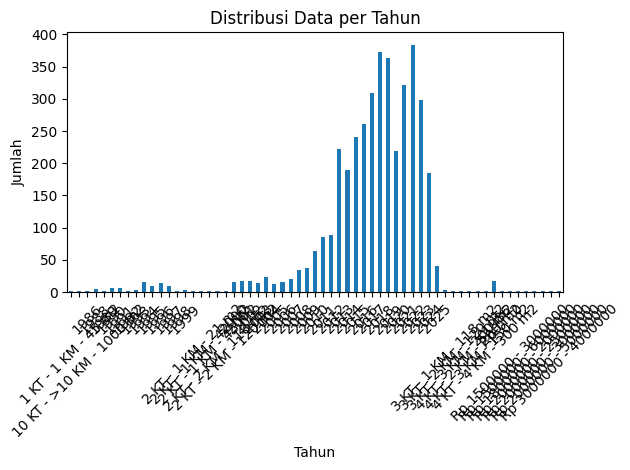

In [54]:
# Checking Data
df['Tahun'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Tahun')
plt.ylabel('Jumlah')
plt.title('Distribusi Data per Tahun')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Terdapat banyak Tahun yang tidak valid sehingga perlu di handling

In [55]:
# Cek nilai tahun valid (4 digit angka)
mask_valid = df['Tahun'].astype(str).str.match(r'^\d{4}$')
valid = df[mask_valid]
invalid = df[~mask_valid]

print(f"Jumlah tahun valid: {len(valid)}")
print(f"Jumlah tahun tidak valid: {len(invalid)}")
print(f"\n Contoh tahun valid: {valid['Tahun'].unique()}")
print(f"\n Contoh tahun tidak valid: {invalid['Tahun'].unique()}")


Jumlah tahun valid: 3931
Jumlah tahun tidak valid: 550

 Contoh tahun valid: ['2015' '2016' '2019' '2017' '2024' '2022' '2023' '2010' '2020' '2013'
 '2014' '2021' '2018' '2025' '2012' '2008' '2007' '2011' '1996' '1997'
 '2003' '2004' '2005' '1990' '1991' '2000' '2009' '1995' '2001' '2002'
 '1994' '2006' '1999' '1988' '1993' '1992' '1998' '1986' '1989']

 Contoh tahun tidak valid: [nan '2 KT - 1 KM - 21 m2' '<1986' '3 KT - 2 KM - 120 m2'
 '3 KT - 1 KM - 118 m2' 'Rp 2000000 - 2500000' '10 KT - >10 KM - 1000 m2'
 '4 KT - 2 KM - 200 m2' '2 KT - 2 KM - 120 m2' 'Rp 0 - 0'
 'Rp 3000000 - 4000000' 'Rp 1500000 - 6000000' 'Rp 2000000 - 5000000'
 'Rp 1800000 - 2000000' 'Rp 1500000 - 3000000' '4 KT - 3 KM - 150 m2'
 '2 KT - 1 KM - 45 m2' '2 KT - 2 KM - 118 m2' '3 KT - 3 KM - 200 m2'
 '4 KT - 4 KM - 300 m2' '1 KT - 1 KM - 45 m2' 'Rp 2000000 - 3000000'
 '2 KT - 1 KM - 42 m2']


In [56]:
df.head()

,Nama_Produk,Lokasi,Tahun,Price,Wilayah
0,Pajak Panjang - Honda Brio Satya 1.2 E Bensin-...,"Bogor Selatan - Kota, Bogor Kota",2015,Rp 96.000.000,Bogor Kota
1,Pajak Panjang - Daihatsu Ayla 1.0 X Bensin-MT ...,"Pulo Gadung, Jakarta Timur",2016,Rp 69.000.000,Jakarta Timur
2,Pajak Panjang - Toyota Calya 1.2 G Bensin-AT 2...,"Pulo Gadung, Jakarta Timur",2019,Rp 114.000.000,Jakarta Timur
3,DP Rendah - Toyota Agya 1.2 G TRD Sportivo Ben...,"Pulo Gadung, Jakarta Timur",2017,Rp 115.000.000,Jakarta Timur
4,Wajib Punya !! BMW X5 xLine xDrive 3.5i 2016,"Kebayoran Lama, Jakarta Selatan",2016,Rp 415.000.000,Jakarta Selatan


In [57]:
# Buang baris dengan tahun tidak valid (bukan 4 digit angka)
df = df[df['Tahun'].astype(str).str.match(r'^\d{4}$')].copy()
# Bersihkan 'Price' hanya dengan menghapus 'Rp' dan memeriksa nilai kosong
df['Price'] = df['Price'].astype(str).str.replace('Rp', '', regex=False).str.replace('.', '', regex=False)
df.isna().sum()


,0
Nama_Produk,0
Lokasi,0
Tahun,0
Price,0
Wilayah,0


* Nilai Missing Value sudah tidak terdeteksi

In [58]:
# Daftar Merek Mobil
daftar_merek = ['Toyota', 'Daihatsu', 'Honda', 'Suzuki', 'Mitsubishi',
                'BMW', 'Mercedes', 'Nissan', 'Wuling', 'Kia', 'Hyundai', 'Mazda']

def ekstrak_merek_tipe(nama_produk):
    for merek in daftar_merek:
        if merek.lower() in nama_produk.lower():
            kata_setelah_merek = nama_produk.split(merek, 1)[-1].strip().split()
            tipe = kata_setelah_merek[0] if kata_setelah_merek else ''
            return pd.Series([merek, tipe])
    return pd.Series(['Lainnya', ''])

df[['Merek', 'Model']] = df['Nama_Produk'].apply(ekstrak_merek_tipe)
df = df[df['Merek'] != 'Lainnya']

In [59]:
# Klasifikasi rill model
model_unik = df['Model'].unique()
noise_keywords = [
    r'^\[', r'\]', r'\(', r'\)', r'^termurah', r'km', r'^cash$',
    r'^jual$', r'^dp$', r'pajak', r'sensing', r'^low', r'^hanya$',
    r'^\d{4}$', r'^\d+(\.\d+)?$', r'^like$', r'^comfort$', r'^tdp',
    r'^murah$', r'^lulus$', r'^istimewa', r'^box$', r'^-$',
    r'^solar$', r'^tdp\d+', r'^km\d+', r'^new$'
]
pattern = re.compile('|'.join(noise_keywords), re.IGNORECASE)

model_bukan_mobil = [model for model in model_unik if pattern.search(str(model).strip())]
model_mobil_asli = [model for model in model_unik if model not in model_bukan_mobil]

print(f"Jumlah total model unik: {len(model_unik)}")
print(f"Jumlah yang bukan model mobil: {len(model_bukan_mobil)}")
print(f"Jumlah yang diduga model mobil asli: {len(model_mobil_asli)}")


Jumlah total model unik: 349
Jumlah yang bukan model mobil: 52
Jumlah yang diduga model mobil asli: 297


In [60]:
df = df[~df['Model'].isin(model_bukan_mobil)].copy()
model_bersih = df['Model'].unique()
print(f"Jumlah Model mobil setelah dibersihkan: {len(model_bersih)}")
print("Contoh Model mobil setelah bersih:")
print(sorted(model_bersih)[:30])  # tampilkan 30 pertama (sorted)



Jumlah Model mobil setelah dibersihkan: 297
Contoh Model mobil setelah bersih:
['-AMG', '-Benz', '218i', '318i', '320i', '325i', '328i', '330i', '430i', '520i', '528i', '530i', '640i', '730Li', '740Li', '740i', '740li', '840i', 'AGYA', 'ANPS', 'APV', 'AVEGA', 'AYLA', 'Accord', 'Aerio', 'Agya', 'Air', 'All', 'Almaz', 'Alphard']


In [61]:
# Penyesuaian Data Model
df['Model'] = df['Model'].str.strip().str.title()
manual_map = {
    'Xpander': ['Expander', 'Xpander', 'XPANDER'],
    'Brio': ['Brio', 'BRIO'],
    'Jazz': ['Jazz', 'JAZZ', 'jazz'],
    'Alphard': ['Alphard', 'alphard', 'Alphrad'],
    'Xtrail': ['Xtrail', 'xtrail', 'X-Trail', 'Extrail'],
    'Crv': ['CRV', 'CR-V', 'Crv'],
    'Hrv': ['HRV', 'HR-V', 'Hrv'],
    'Yaris': ['Yaris', 'YARIS'],
    'Ayla': ['AYLA', 'Ayla'],
    'Agya': ['AGYA', 'Agya'],
    'Raize': ['RAIZE', 'Raize'],
    'Ertiga': ['Ertiga', 'ertiga'],
    'Innova': ['Innova', 'INNOVA'],
}
for standard, variants in manual_map.items():
    df.loc[df['Model'].isin(variants), 'Model'] = standard

print(f"Jumlah Model mobil setelah normalisasi: {df['Model'].nunique()}")
print(sorted(df['Model'].unique())[:30])

df['Model'].unique()

Jumlah Model mobil setelah normalisasi: 220
['-Amg', '-Benz', '218I', '318I', '320I', '325I', '328I', '330I', '430I', '520I', '528I', '530I', '640I', '730Li', '740I', '740Li', '840I', 'Accord', 'Aerio', 'Agya', 'Air', 'All', 'Almaz', 'Alphard', 'Alvez', 'Anps', 'Apv', 'Avanza', 'Avega', 'Ayla']


array(['Brio', 'Ayla', 'Calya', 'Agya', 'X5', 'Benz', 'Hilux', 'Mazda',
       'Alphard', 'Fortuner', 'Innova', 'Freed', 'Xtrail', 'Biante',
       'Ertiga', 'Civic', 'City', 'Santa', 'Hrv', 'Xenia', 'Grand',
       'Sigra', 'Xpander', 'Air', 'Glc200', 'Juke', 'Yaris', 'Mobilio',
       'Livina', 'Raize', 'Honda', 'Pajero', 'Suzuki', '-Amg', 'Nav1',
       'Terios', 'Vios', 'Rush', 'Vellfire', 'Kijang', 'Serena', 'Sienta',
       'Jimny', 'Voxy', 'Cx5', 'Camry', 'Toyota', 'Jazz', '218I', '-Benz',
       'All', 'F10', 'Magnite', 'Cortez', 'Avanza', 'Cx3', 'X7', 'Almaz',
       'Zenix', 'Palisade', 'Baleno', 'Cx-5', 'Creta', 'Swift', 'M3',
       'Delica', 'Rocky', 'Crv', 'March', 'Stargazer', 'Dijual', 'Hiace',
       'Cr-V', 'Hr-V', '530I', '318I', 'Apv', 'Seltos', 'Cx-3', 'Corolla',
       'Br-V', 'Brv', 'Teana', 'Xl7', '740Li', 'M2', 'Sirion', '640I',
       'Mercedes', 'Staria', '330I', 'Terra', 'Outlander', 'Land',
       'Previa', '320I', 'Cloud', 'Harrier', 'Daihatsu', 'Kia', 'Tr

In [62]:
# Check Wilayah
df['Wilayah'].unique()

array(['Bogor Kota', 'Jakarta Timur', 'Jakarta Selatan', 'Jakarta Utara',
       'Tangerang Kota', 'Jakarta Barat', 'Tangerang Selatan Kota',
       'Bekasi Kota', 'Jakarta D.K.I.', 'Jakarta Pusat', 'Bogor Kab.',
       'Serang Kota', 'Tangerang Kab.', 'Bandung Kota',
       'Tasikmalaya Kota', 'Jawa Barat', 'Cilacap Kab.', 'Sleman Kab.',
       'Ciamis Kab.', 'Tasikmalaya Kab.', 'Bandung Kab.', 'Garut Kab.',
       'Kuningan Kab.', 'Kab. Pangandaran', 'Banjar Kota',
       'Sumedang Kab.', 'Serang Kab.', 'Banten', 'Surabaya Kota',
       'Cilegon Kota', 'Denpasar Kota', 'Kab. Badung', 'Tabanan Kab.',
       'Gianyar Kab.', 'Buleleng Kab.', 'Semarang Kota', 'Kab. Bangli',
       'Bali', 'Medan Kota', 'Banda Aceh Kota', 'Aceh Besar Kab.',
       'Lhokseumawe Kota', 'Aceh Tamiang Kab.', 'Asahan Kab.',
       'Deli Serdang Kab.', 'Pidie Kab.', 'Langsa Kota',
       'Bener Meriah Kab.', 'Aceh Barat Kab.', 'Bireuen Kab.',
       'Aceh Timur Kab.', 'Pidie Jaya Kab.', 'Aceh Tengah Kab.',
    

* Terdapat wilayah yang terdeteksi bukan  di Jabodetabek

In [63]:
# Daftar wilayah Jabodetabek
wilayah_jabodetabek = [
    'Jakarta Timur', 'Jakarta Selatan', 'Jakarta Utara', 'Jakarta D.K.I.',
    'Jakarta Barat', 'Jakarta Pusat', 'Bogor Kota', 'Bogor Kab.',
    'Depok Kota', 'Tangerang Kota', 'Tangerang Kab.', 'Tangerang Selatan Kota',
    'Bekasi Kota', 'Bekasi Kab.'  # Tambahkan jika ada
]

# Filter hanya wilayah Jabodetabek
df = df[df['Wilayah'].isin(wilayah_jabodetabek)].reset_index(drop=True)
df

,Nama_Produk,Lokasi,Tahun,Price,Wilayah,Merek,Model
0,Pajak Panjang - Honda Brio Satya 1.2 E Bensin-...,"Bogor Selatan - Kota, Bogor Kota",2015,96000000,Bogor Kota,Honda,Brio
1,Pajak Panjang - Daihatsu Ayla 1.0 X Bensin-MT ...,"Pulo Gadung, Jakarta Timur",2016,69000000,Jakarta Timur,Daihatsu,Ayla
2,Pajak Panjang - Toyota Calya 1.2 G Bensin-AT 2...,"Pulo Gadung, Jakarta Timur",2019,114000000,Jakarta Timur,Toyota,Calya
3,DP Rendah - Toyota Agya 1.2 G TRD Sportivo Ben...,"Pulo Gadung, Jakarta Timur",2017,115000000,Jakarta Timur,Toyota,Agya
4,Wajib Punya !! BMW X5 xLine xDrive 3.5i 2016,"Kebayoran Lama, Jakarta Selatan",2016,415000000,Jakarta Selatan,BMW,X5
...,...,...,...,...,...,...,...
2144,Daihatsu YR-V 2001 CBU YRV langka,"Ciputat, Tangerang Selatan Kota",2001,69000000,Tangerang Selatan Kota,Daihatsu,Yr-V
2145,Suzuki Ertiga GX 1.5 AT 2021 Abu,"Pondok Aren, Tangerang Selatan Kota",2021,180000000,Tangerang Selatan Kota,Suzuki,Ertiga
2146,[LOW KM] Honda BRV Prestige Non Sensing 1.5 C...,"Ciputat, Tangerang Selatan Kota",2023,242000000,Tangerang Selatan Kota,Honda,Brv
2147,Wuling Alvez 2023 Bensin,"Serpong, Tangerang Selatan Kota",2023,250000000,Tangerang Selatan Kota,Wuling,Alvez


In [64]:
# Mengubah kolom Price dan Tahun ke INT
df['Price'] = df['Price'].astype(int)
df['Tahun'] = df['Tahun'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Nama_Produk  2149 non-null   object
 1   Lokasi       2149 non-null   object
 2   Tahun        2149 non-null   int64 
 3   Price        2149 non-null   int64 
 4   Wilayah      2149 non-null   object
 5   Merek        2149 non-null   object
 6   Model        2149 non-null   object
dtypes: int64(2), object(5)
memory usage: 117.7+ KB


# Data Visualizations


## Harga Tertinggi, Terendah dan Rata-Rata berdasarkan Merek (/10 Tahun)

In [65]:
# Buat kategori rentang 5 tahunan
def kategori_tahun(tahun):
    start = (tahun - 1998) // 5 * 5 + 1998
    end = start + 4
    return f"{start}-{end}"

# Tambahkan kolom kategori 5 tahunan
df['Periode'] = df['Tahun'].apply(kategori_tahun)

# Ambil Price maksimum dan minimum serta mereknya untuk tiap periode
hasil = []

for periode, group in df.groupby('Periode'):
    # Data Price maksimum
    idx_max = group['Price'].idxmax()
    max_row = df.loc[idx_max]

    # Data Price minimum
    idx_min = group['Price'].idxmin()
    min_row = df.loc[idx_min]

    # Harga rata-rata, format dengan koma sebagai pemisah ribuan
    avg_price = "{:,.0f}".format(group['Price'].mean())

    # Menambahkan data periode, harga tertinggi dan terendah
    hasil.append({
        'Periode': periode,
        'Merek_Termahal': max_row['Merek'],
        'Price_Termahal': "{:,.0f}".format(max_row['Price']),  # Format dengan koma
        'Merek_Termurah': min_row['Merek'],
        'Price_Termurah': "{:,.0f}".format(min_row['Price']),  # Format dengan koma
        'Rata_rata_Harga': avg_price
    })

# Konversi hasil menjadi DataFrame
df_ringkasan = pd.DataFrame(hasil)

# Tampilkan hasil
print(df_ringkasan)


     Periode Merek_Termahal Price_Termahal Merek_Termurah Price_Termurah  \
0  1988-1992       Mercedes    580,000,000       Daihatsu     10,000,000   
1  1993-1997            BMW    110,000,000         Suzuki     20,000,000   
2  1998-2002         Toyota    275,000,000         Nissan     43,000,000   
3  2003-2007       Mercedes    260,000,000     Mitsubishi     33,500,000   
4  2008-2012         Toyota  1,100,000,000         Suzuki     67,000,000   
5  2013-2017       Mercedes    855,000,000         Toyota     63,000,000   
6  2018-2022       Mercedes  3,900,000,000       Daihatsu     78,000,000   
7  2023-2027       Mercedes  3,400,000,000         Wuling     95,500,000   

  Rata_rata_Harga  
0     238,250,000  
1      57,150,000  
2      83,188,984  
3      93,637,931  
4     216,729,204  
5     195,256,785  
6     365,603,971  
7     608,260,079  


* Terlihat Harga termahal di setiap rental 5 tahunan sampai 2027.
* Mayoritas untuk Harga termahal terdapat di Merek **Mercedes**
* Mayoritas untuk Harga termurah terdapat di Merek **Daihatsu**

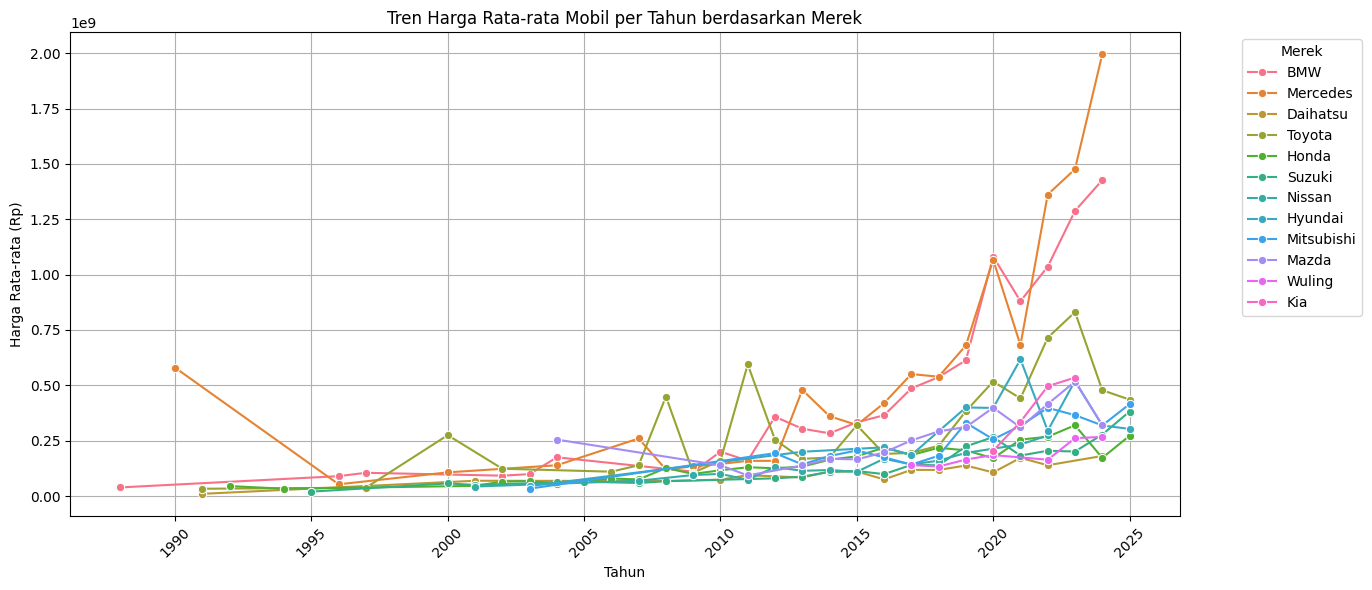

In [66]:
# Hitung rata-rata harga per tahun dan merek
df_avg = df.groupby(['Tahun', 'Merek'])['Price'].mean().reset_index()

# Buat plot tren
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_avg, x='Tahun', y='Price', hue='Merek', marker='o')

plt.title('Tren Harga Rata-rata Mobil per Tahun berdasarkan Merek')
plt.xlabel('Tahun')
plt.ylabel('Harga Rata-rata (Rp)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Merek', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


* Dapat dilihat untuk Tren dari BMW naik signifikan sejak tahun 2020 , Sedangkan yang lainnya cenderung stagnant

## Depresiasi Harga


In [67]:
def hitung_depresiasi(tahun, harga_awal, tahun_sekarang=2025):
    usia = tahun_sekarang - tahun
    if usia < 1:
        return harga_awal
    return harga_awal * ((1 - 0.10) ** usia)


* Nilai Depresiasi berada di rentang 10-15%. Pengambilan 10% merupakan nilai aman untuk melakukan prediksi menggunakan AI


In [68]:
# Tahun sekarang
tahun_sekarang = datetime.now().year

# Hitung usia mobil
df['Usia'] = tahun_sekarang - df['Tahun']

# Asumsi depresiasi 10% per tahun
depresiasi_rate = 0.10
df['Harga_Terkoreksi'] = df['Price'] * ((1 - depresiasi_rate) ** df['Usia'])
df['Harga_Terkoreksi'] = df['Harga_Terkoreksi'].round(0).astype(int)

# Lihat hasil
df.head(3)


,Nama_Produk,Lokasi,Tahun,Price,Wilayah,Merek,Model,Periode,Usia,Harga_Terkoreksi
0,Pajak Panjang - Honda Brio Satya 1.2 E Bensin-...,"Bogor Selatan - Kota, Bogor Kota",2015,96000000,Bogor Kota,Honda,Brio,2013-2017,10,33473130
1,Pajak Panjang - Daihatsu Ayla 1.0 X Bensin-MT ...,"Pulo Gadung, Jakarta Timur",2016,69000000,Jakarta Timur,Daihatsu,Ayla,2013-2017,9,26732014
2,Pajak Panjang - Toyota Calya 1.2 G Bensin-AT 2...,"Pulo Gadung, Jakarta Timur",2019,114000000,Jakarta Timur,Toyota,Calya,2018-2022,6,60584274


In [69]:
# Simpan data bersih
# df.to_csv('data_mobil_new.csv')

# Generative AI

In [70]:
# Encoder disiapkan berdasarkan nilai string asli
le_merek = LabelEncoder()
le_Model = LabelEncoder()

# Fit encoder ke data string asli
df['Merek_encoded'] = le_merek.fit_transform(df['Merek'])
df['Model_encoded'] = le_Model.fit_transform(df['Model'])

# Fitur dan target
X = df[['Merek_encoded', 'Model_encoded', 'Tahun']]
y = df['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor(n_estimators=3, random_state=19)
model.fit(X_train, y_train)

# Evaluasi model
y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2:.2f}")
# Fungsi prediksi
def prediksi_harga(merek, Model, tahun):
    if merek not in le_merek.classes_:
        return f"Merek '{merek}' tidak dikenali. Pilihan: {list(le_merek.classes_)}"
    if Model not in le_Model.classes_:
        return f"Model '{Model}' tidak dikenali. Pilihan: {list(le_Model.classes_)}"

    merek_encoded = le_merek.transform([merek])[0]
    Model_encoded = le_Model.transform([Model])[0]
    input_data = pd.DataFrame([[merek_encoded, Model_encoded, tahun]], columns=['Merek_encoded', 'Model_encoded', 'Tahun'])
    harga_prediksi = model.predict(input_data)[0]
    return harga_prediksi


Mean Absolute Error: 43217188.35
Mean Squared Error (MSE): 15990366283859146.00
R-squared (R²): 0.83


* Nilai MAE adalah 43 jt. Hal ini cukup dalam rentan aman untuk memprediksi harga dengan range diatas 100jt

* Hal tersebut di dukung dengan nilai MSE yang sudah bagus.

* Nilai R-squared yang tergolong tinggi dan bernilai 83% bisa di katakan model sudah baik dalam memprediksi harga mobil bekas

# Try Model

In [71]:
# Antarmuka input
print("\nMasukkan informasi mobil untuk prediksi harga bekas.")
print(f"Daftar Merek yang tersedia: {list(le_merek.classes_)}")
print(f"Daftar Model yang tersedia: {list(le_Model.classes_)}")

merek_input = input("Merek Mobil (misal: Honda): ")
Model_input = input("Model Mobil (misal: Brio): ")
tahun_input = int(input("Tahun Mobil (misal: 2015): "))

hasil = prediksi_harga(merek_input, Model_input, tahun_input)

if isinstance(hasil, str):
    print(hasil)
else:
    print(f"\nHarga prediksi mobil bekas {merek_input} {Model_input} tahun {tahun_input} adalah: Rp {hasil:,.2f}")


Masukkan informasi mobil untuk prediksi harga bekas.
Daftar Merek yang tersedia: ['BMW', 'Daihatsu', 'Honda', 'Hyundai', 'Kia', 'Mazda', 'Mercedes', 'Mitsubishi', 'Nissan', 'Suzuki', 'Toyota', 'Wuling']
Daftar Model yang tersedia: ['-Amg', '-Benz', '218I', '318I', '320I', '325I', '328I', '330I', '520I', '528I', '530I', '640I', '730Li', '740I', '740Li', '840I', 'Accord', 'Agya', 'Air', 'All', 'Almaz', 'Alphard', 'Alvez', 'Apv', 'Avanza', 'Ayla', 'Baleno', 'Benz', 'Biante', 'Bmw', 'Br-V', 'Brio', 'Brv', 'Calya', 'Camry', 'Carens', 'Carry', 'Chr', 'Cielo', 'City', 'Civic', 'Cloud', 'Colt', 'Confero', 'Corolla', 'Corona', 'Cortez', 'Cr-V', 'Creta', 'Crv', 'Cx', 'Cx-3', 'Cx-5', 'Cx-7', 'Cx-8', 'Cx3', 'Cx30', 'Cx5', 'Cx9', 'Cygnus', 'Daihatsu', 'Delica', 'Dijual', 'E39', 'E90', 'Eclipse', 'Ertiga', 'Escudo', 'Esteem', 'Etios', 'Evalia', 'F10', 'F30', 'Fe', 'Fortuner', 'Freed', 'Glc200', 'Gran', 'Grand', 'H-1', 'H1', 'Harrier', 'Hiace', 'Hilux', 'Honda', 'Hr-V', 'Hrv', 'Hws', 'Hyundai', 'Ign

# Simpan Model

In [72]:
df.to_csv('data_mobil_new.csv')

In [73]:
# # # Simpan model dan encoder
joblib.dump(model, 'model_harga_mobil.pkl')
joblib.dump(le_merek, 'le_merek.pkl')
joblib.dump(le_Model, 'le_model.pkl')

['le_model.pkl']